In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isdir, isfile, join

import peakutils
import matplotlib.pyplot as plt
from peakutils.plot import plot as pplot
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

# preprocessing from each files 

In [2]:
def read_file(name, foot):
    if foot == 'rightfoot':
        _type = 'R'
    if foot == 'leftfoot':
        _type = 'L'
        
    fileName = name + "/" + foot + "/acc.xls"
    df = pd.read_table(fileName,header=-1)
    df['time']=df[0]
    df['acc'+_type]=(df[1]**2 + df[2]**2 + df[3]**2)**(0.5)
    df_acc = df[['time','acc'+_type]]
    
    fileName = name + "/" + foot + "/Gyro.xls"
    df = pd.read_table(fileName,header=-1)
    df['time']=df[0]
    df['gyro'+_type]=(df[1]**2 + df[2]**2 + df[3]**2)**(0.5)
    df_gyro = df[['time','gyro'+_type]]
    
    fileName = name + "/" + foot + "/Center of gravity.xls"
    df = pd.read_table(fileName,header=-1)
    df['time']=df[0]
    df['gravity'+_type]=(df[1]**2 + df[2]**2)**(0.5)
    df_cog = df[['time','gravity'+_type]]

    fileName = name + "/" + foot + "/Variation_total_pressure.xls"
    df = pd.read_table(fileName,header=-1)
    df_vtp = df.rename(columns={df.columns[0]: 'time',df.columns[1]: 'votp'+_type})
    y = df_vtp['votp'+_type]

    df_all = df_acc.merge(df_gyro,on='time').merge(df_cog,on='time').merge(df_vtp,on='time')
    return df_all

In [3]:
def normalize(df_all):
    StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler = StandardScaler()
    # exclude time
    scaler.fit_transform(df_all.iloc[:,1:])

    df_all_columns = df_all.columns[1:]
    x_scaled = scaler.transform(df_all.iloc[:,1:])

    df_all.iloc[:,1:] = x_scaled
    return df_all

In [4]:
def peak_valley(df_all, foot, runner):
    if foot == 'rightfoot':
        _type = 'R'
    if foot == 'leftfoot':
        _type = 'L'

    y = df_all['votp'+_type]
    indexes = peakutils.indexes(y, thres=0.5, min_dist=22)
    df_all['peak'+_type] = 0
    df_all.loc[df_all.index[indexes], 'peak'+_type] = 1
    peak = df_all.loc[df_all['peak'+_type]==1]

    indexes = peakutils.indexes(-y, thres=0.5, min_dist=30)
    df_all['valley'+_type]=0
    df_all.loc[df_all.index[indexes], 'valley'+_type] = 1
    valley = df_all.loc[df_all['valley'+_type]==1]
    
    fileName = runner + '_' + foot + '.csv'
    df_all.to_csv(fileName, index = False)
    fileList.append(fileName)
    
    return fileList    

In [5]:
# get all runners' names from the folder
runners = [i for i in [f for f in listdir('./') if isdir(join('./', f))] if i[0] != '.']
feet = ['rightfoot', 'leftfoot']

In [6]:
# use the functions to preprocess each runner
fileList = []
for runner in runners:
    for foot in feet:
        df_all = read_file(runner, foot)
        df_all = normalize(df_all)
        fileList = peak_valley(df_all, foot, runner)

In [7]:
fileList

['BinJoe_rightfoot.csv',
 'BinJoe_leftfoot.csv',
 'chanHon_rightfoot.csv',
 'chanHon_leftfoot.csv',
 'ChiSan_rightfoot.csv',
 'ChiSan_leftfoot.csv',
 'chunLin_rightfoot.csv',
 'chunLin_leftfoot.csv',
 'HuaiYu_rightfoot.csv',
 'HuaiYu_leftfoot.csv',
 'JiaLin_rightfoot.csv',
 'JiaLin_leftfoot.csv',
 'Pohan_rightfoot.csv',
 'Pohan_leftfoot.csv',
 'YuanChi_rightfoot.csv',
 'YuanChi_leftfoot.csv']

# combine left&right foot

In [469]:
dfAll = pd.DataFrame()
dfLeft = pd.read_csv(fileList[2])
dfRight = pd.read_csv(fileList[3])
dfAll = dfLeft.merge(dfRight,on='time')
dfAll.tail(8)

,time,accR,gyroR,gravityR,votpR,peakR,valleyR,accL,gyroL,gravityL,votpL,peakL,valleyL
3649,2018-07-17 14:36:50.564,-0.743104,-1.235290,0.008477,-0.034640,0,0,-0.769024,-1.203616,0.045662,1.033741,0,0
3650,2018-07-17 14:36:50.596,-0.743194,-1.235405,-0.004887,-0.040024,0,0,-0.769024,-1.203616,0.045662,1.033741,0,0
3651,2018-07-17 14:36:50.629,-0.743194,-1.235405,-0.004887,-0.040024,0,0,-0.773737,-1.207284,0.020026,1.039754,0,0
3652,2018-07-17 14:36:50.662,-0.742743,-1.238257,-0.004887,-0.057006,0,1,-0.774123,-1.207864,0.020026,1.043361,0,0
3653,2018-07-17 14:36:50.694,-0.742743,-1.238257,-0.004887,-0.057006,0,0,-0.771938,-1.205438,-0.005585,1.048172,0,0
3654,2018-07-17 14:36:50.727,-0.749381,-1.238811,-0.033533,-0.054934,0,0,-0.762696,-1.204159,-0.031172,1.056991,0,0
3655,2018-07-17 14:36:50.761,-0.749494,-1.237534,-0.062137,-0.054931,0,0,-0.772572,-1.203509,-0.031172,1.067413,0,0
3656,2018-07-17 14:36:50.793,-0.749494,-1.237534,-0.062137,-0.054931,0,0,-0.761986,-1.199983,-0.056732,1.076633,0,0


# Split Cycle

In [470]:
wave = pd.DataFrame()
period_index = dfAll.index.values

for i in range(len(period_index)):
    if i == 0:
        wave.loc[i, 'time'] = dfAll['time'][0]
        wave.loc[i, 'startIndex'] = period_index[i]
    elif i == len(period_index)-2:
        wave.loc[i, 'time'] = dfAll['time'][i]
        wave.loc[i, 'startIndex'] = (len(period_index)-1)
    elif i == len(period_index)-1:
        wave.loc[i, 'time'] = dfAll['time'][i]
        wave.loc[i, 'startIndex'] = (len(period_index)-1)
    else:
        if dfAll['votpR'][i]<dfAll['votpL'][i] and dfAll['votpR'][i+1]>dfAll['votpL'][i+1]:
            wave.loc[i, 'time'] = dfAll['time'][period_index[i]]
            wave.loc[i, 'startIndex'] = period_index[i]
        if dfAll['votpR'][i]>dfAll['votpL'][i] and dfAll['votpR'][i+1]<dfAll['votpL'][i+1]:
            wave.loc[i, 'time'] = dfAll['time'][period_index[i]]
            wave.loc[i, 'startIndex'] = period_index[i]

wave = wave.reset_index(drop=True)
row_index = wave.index.values

for row in range(len(wave)-2):
    wave.loc[row, 'endIndex'] = wave['startIndex'][row+1]

wave = wave[:-2]
wave.head()

,time,startIndex,endIndex
0,2018-07-17 14:34:50.146,0.0,29.0
1,2018-07-17 14:34:51.102,29.0,47.0
2,2018-07-17 14:34:51.697,47.0,61.0
3,2018-07-17 14:34:52.158,61.0,77.0
4,2018-07-17 14:34:52.688,77.0,96.0


In [471]:
# add feature 
from datetime import datetime

row_index = wave.index.values
for i in range(len(row_index)):
    wave.loc[i, 'indexDiff'] = wave['endIndex'][i] - wave['startIndex'][i]
    wave.loc[i, 'indexInverse'] = 1/wave['indexDiff'][i]
    start = int(wave['startIndex'][i])
    end = int(wave['endIndex'][i])
    
    startTime = datetime.strptime(dfAll['time'][start], '%Y-%m-%d %H:%M:%S.%f')
    endTime = datetime.strptime(dfAll['time'][end], '%Y-%m-%d %H:%M:%S.%f')
    duration = str(endTime - startTime)
    duration = ''.join(list(duration)[6:-3])
    wave.loc[i, 'duration'] = duration
    wave.loc[i, 'frequency'] = 1/float(wave['duration'][i])
    wave.loc[i, 'votpMean'] = (dfAll['votpR'][start:end].values+dfAll['votpL'][start:end].values).mean()
    wave.loc[i, 'max'] = max(dfAll['votpR'][start:end].values)
    wave.loc[i, 'maxL'] = max(dfAll['votpL'][start:end].values)
    wave.loc[i, 'min'] = min(dfAll['votpR'][start:end].values)
    wave.loc[i, 'minL'] = min(dfAll['votpL'][start:end].values)
    if wave['maxL'][i] > wave['max'][i]:
        wave['max'][i] = wave['maxL'][i]
    if wave['minL'][i] < wave['min'][i]:
        wave['min'][i] = wave['minL'][i]
wave.drop(columns=['maxL','minL'], inplace=True) 
wave['speed'] = (wave['max']-wave['min'])/wave['indexDiff']

In [472]:
wave.head()

,time,startIndex,endIndex,indexDiff,indexInverse,duration,frequency,votpMean,max,min,speed
0,2018-07-17 14:34:50.146,0.0,29.0,29.0,0.034483,0.956,1.046025,0.254948,1.121705,-1.071780,0.075637
1,2018-07-17 14:34:51.102,29.0,47.0,18.0,0.055556,0.595,1.680672,0.164928,1.302003,-1.073872,0.131993
2,2018-07-17 14:34:51.697,47.0,61.0,14.0,0.071429,0.461,2.169197,-0.287956,1.031466,-1.088348,0.151415
3,2018-07-17 14:34:52.158,61.0,77.0,16.0,0.062500,0.530,1.886792,0.219343,1.329694,-1.070666,0.150022
4,2018-07-17 14:34:52.688,77.0,96.0,19.0,0.052632,0.625,1.600000,0.132432,1.436638,-1.102844,0.133657


In [473]:
# add feature: acc and gyro
#acc: each foot has x,y,z three value, combine by square sum root, and add two feet together
#_acc: count peak and valley for acc
#accMean: calculate mean
dfAll['acc'] = dfAll['accL']+dfAll['accR']
dfAll['gyro'] = dfAll['gyroL']+dfAll['gyroR']
dfAll['gravity'] = dfAll['gravityL']+dfAll['gravityR']

accPeak = peakutils.indexes(dfAll["acc"], thres=0.001, min_dist=2.5)
accValley = peakutils.indexes(-dfAll["acc"], thres=0.001, min_dist=2.5)
accIndex = np.concatenate((accPeak, accValley), axis=None)

gyroPeak = peakutils.indexes(dfAll["gyro"], thres=0.001, min_dist=2.5)
gyroValley = peakutils.indexes(-dfAll["gyro"], thres=0.001, min_dist=2.5)
gyroIndex = np.concatenate((gyroPeak, gyroValley), axis=None)

In [474]:
wave['_acc']=0
wave['_gyro']=0

for i in range(len(row_index)):
    start = int(wave['startIndex'][i])
    end = int(wave['endIndex'][i])
    wave.loc[i, 'accMean'] = np.absolute(dfAll['acc'][start:end].values).mean() #平均加速度
    wave.loc[i, 'speedVariation'] = np.absolute(dfAll['acc'][start:end].values).sum() #速度變化量
    wave.loc[i, 'gyroMean'] = np.absolute(dfAll['gyro'][start:end].values).mean()
    wave.loc[i, 'gyroSpeed'] = np.absolute(dfAll['gyro'][start:end].values).sum()
    wave.loc[i, 'gravityspeed'] = np.absolute(dfAll['gravity'][start:end].values).mean()
    for j in accIndex:
        if start<=j and j<end:
            wave['_acc'][i]+=1
    for j in gyroIndex:
        if start<=j and j<end:
            wave['_gyro'][i]+=1
wave.tail()

,time,startIndex,endIndex,indexDiff,indexInverse,duration,frequency,votpMean,max,min,speed,_acc,_gyro,accMean,speedVariation,gyroMean,gyroSpeed,gravityspeed
226,2018-07-17 14:36:43.171,3425.0,3441.0,16.0,0.062500,0.527,1.897533,-0.105628,0.857958,-1.093318,0.121955,7,6,1.017787,16.284594,0.671374,10.741985,1.145291
227,2018-07-17 14:36:43.698,3441.0,3539.0,98.0,0.010204,3.234,0.309215,0.251708,1.125179,-1.077881,0.022480,36,32,1.440741,141.192603,1.981095,194.147302,1.775046
228,2018-07-17 14:36:46.932,3539.0,3563.0,24.0,0.041667,0.794,1.259446,0.521468,1.557328,-1.108643,0.111082,12,8,1.364170,32.740091,1.784403,42.825677,0.818125
229,2018-07-17 14:36:47.726,3563.0,3606.0,43.0,0.023256,1.418,0.705219,0.226170,1.164972,-1.085096,0.052327,16,12,1.446166,62.185157,1.758863,75.631097,0.765656
230,2018-07-17 14:36:49.144,3606.0,3656.0,50.0,0.020000,1.649,0.606428,0.805507,1.451165,-1.029947,0.049622,21,13,1.500621,75.031047,2.252526,112.626321,0.776716


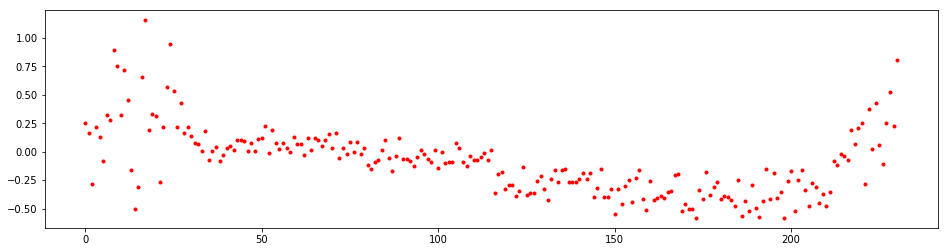

In [475]:
plt.figure(figsize=(16,4))
plt.plot(wave['votpMean'],'.', color='r')
#plt.yticks(list(set(wave['y_pred'])))
plt.show()

# Apply Model

In [476]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(wave.iloc[:,3:])

D:\Users\Lindsay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\Lindsay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [477]:
# outlier preprocessing
from sklearn.ensemble import IsolationForest
clf = IsolationForest(behaviour='new', max_samples='auto', contamination='auto')
outlier = clf.fit_predict(X_std)

# K-means

In [478]:
# y_pred: default is (-2), outlier is (-1), predict results range from 0-2
wave['y_pred'] = -2
for index, value in enumerate(outlier):
    if value == -1:
        wave['y_pred'][index] = -1
# split outlier and predict data 
dfOutlier = wave.copy()
dfOutlier = dfOutlier[dfOutlier.y_pred == -1]
dfPredict = wave.copy()
dfPredict = dfPredict[dfPredict.y_pred == -2]

In [479]:
# run kmeans model
from sklearn.cluster import KMeans
X_std = dfPredict.iloc[:,3:]
clusterNum = 3
km = KMeans(clusterNum) 
y_pred = km.fit_predict(X_std)
# fill in predict result
for i in range(len(dfPredict)):
    dfPredict['y_pred'][dfPredict.index.values[i]] = y_pred[i]

In [480]:
# sort the predict cluster order 
cluster = [[0 for x in range(3)] for y in range(clusterNum)] 
for i in range(clusterNum):
    cluster[i][0] = dfPredict[dfPredict['y_pred'] == i].index.values
    cluster[i][1] = dfPredict[dfPredict['y_pred'] == i]['max'].mean()
    cluster[i][2] = i

def getKey(item):
    return item[1]
cluster = sorted(cluster, key=getKey)

for i in range(clusterNum):
    dfPredict.loc[cluster[i][0], 'y_pred'] = i

In [481]:
wave = dfPredict.append(dfOutlier)
wave = wave.sort_index()
# add +1 to each y_pred so that the result will change from -1~2 to 0-3
for i in range(len(wave)):
    wave.loc[i, 'y_pred'] = wave['y_pred'][i]+1

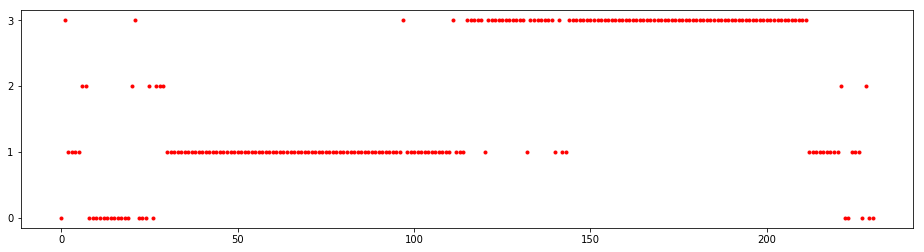

In [484]:
plt.figure(figsize=(16,4))
plt.plot(wave['y_pred'],'.', color='r')
plt.yticks(list(set(wave['y_pred'])))
plt.show()

In [58]:
# # loop 每個點 x 如果 前後(x+1,x-1)都是同一類   ((也可以延長到 x+2 +3 之累的
# # 但 x 不同類 改成 x+1的類別
# for index,element in enumerate(y_pred):
#     if index > 2 and index < len(y_pred)-2:
#         if y_pred[index-2] == y_pred[index-1] and y_pred[index-1] == y_pred[index+1] and y_pred[index+1] == y_pred[index+2] and y_pred[index-1] != element:
#             y_pred[index] = y_pred[index-1]
#         if y_pred[index-1] != y_pred[index] and y_pred[index] != y_pred[index+1]:
#             y_pred[index] = 0

In [60]:
# wave[['startIndex','y_pred']].to_csv("result_wave.csv")
# df0 = pd.read_csv("result_wave.csv")
# df0 = df0.drop(['Unnamed: 0'], axis=1)
# df0.head(),df0.shape

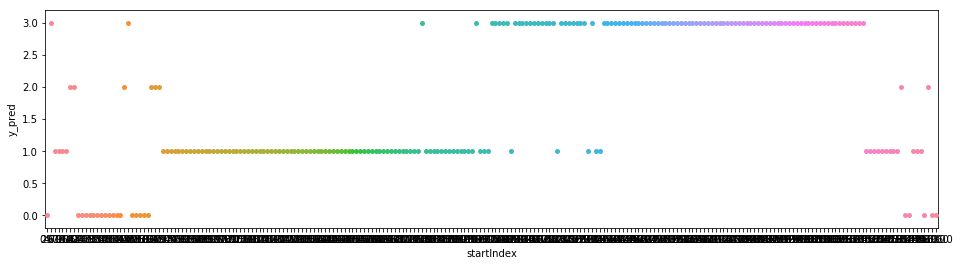

In [88]:
import seaborn as sns
plt.figure(figsize=(16,4))
sns.swarmplot(x=wave['startIndex'], y=wave['y_pred'])

In [230]:
# put the result from wave to dfAll
for i in range(len(wave)-2):
    start = int(wave['startIndex'][i])
    end = int(wave['endIndex'][i])
    y_pred = int(wave['y_pred'][i])
    dfAll['y_pred'][start:end] = y_pred

In [238]:
# dfAll[['time','y_pred']].to_csv("result_chanHon_kmeans.csv")

In [430]:
dfResult = pd.read_csv("result_chanHon_kmeans.csv").drop(['Unnamed: 0'], axis=1)
dfResult.head()

,time,y,_y,y_pred
0,34:50.1,0,0,0
1,34:50.2,0,0,0
2,34:50.2,0,0,0
3,34:50.2,0,0,0
4,34:50.3,0,0,0


In [431]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(dfResult['y'], dfResult['y_pred'])
accuracy

0.7022149302707137

In [485]:
accuracy = accuracy_score(dfResult['_y'], dfResult['y_pred'])
accuracy

0.883237626469784

# Hierarchical Clustering 

In [396]:
# y_pred: default is (-2), outlier is (-1), predict results range from 0-2
wave['y_pred'] = -2
for index, value in enumerate(outlier):
    if value == -1:
        wave['y_pred'][index] = -1
# split outlier and predict data 
dfOutlier = wave.copy()
dfOutlier = dfOutlier[dfOutlier.y_pred == -1]
dfPredict = wave.copy()
dfPredict = dfPredict[dfPredict.y_pred == -2]

In [397]:
from sklearn.cluster import AgglomerativeClustering
X_std = dfPredict.iloc[:,3:-1]
clusterNum = 3
hierachicalClustering = AgglomerativeClustering(n_clusters=clusterNum, affinity='euclidean', linkage='ward')  
y_pred = hierachicalClustering.fit_predict(X_std)
# fill in predict result
for i in range(len(dfPredict)):
    dfPredict['y_pred'][dfPredict.index.values[i]] = y_pred[i]

In [410]:
# sort the predict cluster order 
cluster = [[0 for x in range(3)] for y in range(clusterNum)] 
for i in range(clusterNum):
    cluster[i][0] = dfPredict[dfPredict['y_pred'] == i].index.values
    cluster[i][1] = dfPredict[dfPredict['y_pred'] == i]['votpMean'].mean()
    cluster[i][2] = i

def getKey(item):
    return -item[1]
cluster = sorted(cluster, key=getKey)

for i in range(clusterNum):
    dfPredict.loc[cluster[i][0], 'y_pred'] = i

In [414]:
wave = dfPredict.append(dfOutlier)
wave = wave.sort_index()
# add +1 to each y_pred so that the result will change from -1~2 to 0-3
for i in range(len(wave)):
    wave.loc[i, 'y_pred'] = wave['y_pred'][i]+1

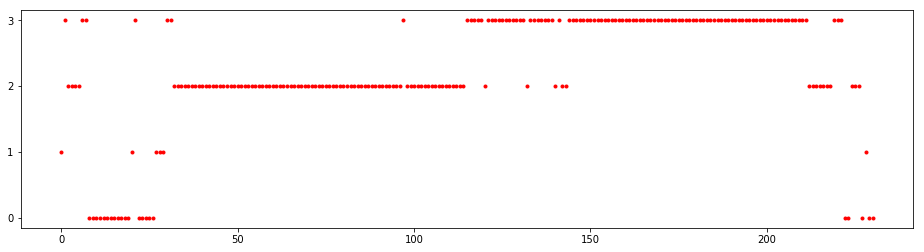

In [415]:
plt.figure(figsize=(16,4))
plt.plot(wave['y_pred'],'.', color='r')
plt.yticks(list(set(wave['y_pred'])))
plt.show()

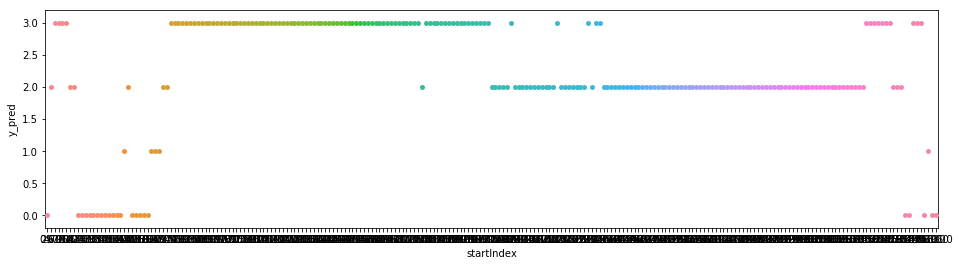

In [96]:
import seaborn as sns
plt.figure(figsize=(16,4))
sns.swarmplot(x=wave['startIndex'], y=wave['y_pred'])

In [416]:
# put the result from wave to dfAll
dfAll['y_pred'] = 0
for i in range(len(wave)-2):
    start = int(wave['startIndex'][i])
    end = int(wave['endIndex'][i])
    y_pred = int(wave['y_pred'][i])
    dfAll['y_pred'][start:end] = y_pred

In [417]:
# dfAll[['time','y_pred']].to_csv("result_chanHon_hier.csv")

In [423]:
dfResult = pd.read_csv("result_chanHon_hier.csv").drop(['Unnamed: 0'], axis=1)
dfResult.head()

,time,y,_y,y_pred
0,34:50.1,0,0,1
1,34:50.2,0,0,1
2,34:50.2,0,0,1
3,34:50.2,0,0,1
4,34:50.3,0,0,1


In [424]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(dfResult['y'], dfResult['y_pred'])
accuracy

0.6622914957615532

In [425]:
accuracy = accuracy_score(dfResult['_y'], dfResult['y_pred'])
accuracy

0.8115942028985508

# Birch

In [133]:
# y_pred: default is (-2), outlier is (-1), predict results range from 0-2
wave['y_pred'] = -2
for index, value in enumerate(outlier):
    if value == -1:
        wave['y_pred'][index] = -1
# split outlier and predict data 
dfOutlier = wave.copy()
dfOutlier = dfOutlier[dfOutlier.y_pred == -1]
dfPredict = wave.copy()
dfPredict = dfPredict[dfPredict.y_pred == -2]

In [134]:
from sklearn.cluster import Birch
X_std = dfPredict.iloc[:,3:-1]
clusterNum = 3

brc = Birch(branching_factor=50, n_clusters=clusterNum, threshold=0.5,
compute_labels=True).fit(X_std)
y_pred = brc.predict(X_std)
y_pred

# fill in predict result
for i in range(len(dfPredict)):
    dfPredict['y_pred'][dfPredict.index.values[i]] = y_pred[i]

In [135]:
wave = dfPredict.append(dfOutlier)
wave.sort_index()
# add +1 to each y_pred so that the result will change from -1~2 to 0-3
for i in range(len(wave)):
    wave.loc[i, 'y_pred'] = wave['y_pred'][i]+1

In [136]:
# sort the predict cluster order 
cluster = [[0 for x in range(3)] for y in range(clusterNum)] 
for i in range(clusterNum):
    cluster[i][0] = wave[wave['y_pred'] == i].index.values
    cluster[i][1] = wave[wave['y_pred'] == i]['max'].mean()
    cluster[i][2] = i

def getKey(item):
    return item[1]
cluster = sorted(cluster, key=getKey)

for i in range(clusterNum):
    wave.loc[cluster[i][0], 'y_pred'] = i

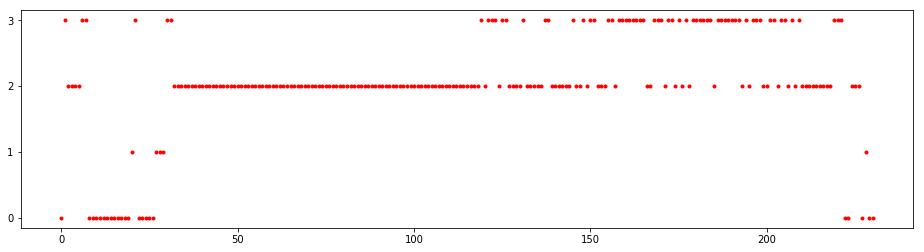

In [137]:
plt.figure(figsize=(16,4))
plt.plot(wave['y_pred'],'.', color='r')
plt.yticks(list(set(wave['y_pred'])))
plt.show()

In [ ]:
gmm = mixture.GMM(covariance_type='full', n_components=4)
gmm.fit(X_std)
y_pred_gmm = gmm.predict(X_std)

In [ ]:
plt.figure(figsize=(16,4))
#plt.plot(y)
plt.plot(y_pred_gmm,'*', color='r')
plt.yticks(list(set(y_pred_gmm)))
plt.show()

In [ ]:
# 我覺得 R, L 要分開跑欸 ， 時間點上會有點重複ㄅ 而且這樣畫的圖 比較難跟原本的圖比較 x軸變長的感覺? ->這個不會吧 就只是跑到下一個peak的時間都被除以二的概念?
# 我的想法拉 給你參考
# 是我的話 先跑完R的 不是波的分類ㄇ 我會把全部的點 照他在哪個波裡 幫她標上類別 
# 然後有兩隻腳 都這樣跑一次  ， 甚至 現在是跑 peak 如果加上 valley 每個點就有4次分類的結果
# 也許可以用多數決的方式 幫每個點分類??????????? QQ
# 而且! 你現在只是 0~3 的分類沒有意義 得再弄規則 轉成有意義的 0 就是 沒再走之類的啥意思
# 現在分成 0 的 不代表一定就是沒再走    3 也不一定就是跑步這樣ㄅ???????????????????????

# 感覺只是左腳分得比較不好XDD 鰻爛的XDD